In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("D:\\IMDB_TOP_1000_M2.xlsx")

In [3]:
df.head(10)

,rank,movie_name,yearofrelaease,watchtime,rating,metascore,votes,collection
0,1,The Shawshank Redemption,1994,142,9.3,81,2699185,28.34
1,2,The Godfather,1972,175,9.2,100,1873380,134.97
2,3,The Dark Knight,2008,152,9.0,84,2672907,534.86
3,4,Schindler's List,1993,195,9.0,95,1364528,96.9
4,5,The Godfather Part II,1974,202,9.0,90,1280242,57.3
5,6,12 Angry Men,1957,96,9.0,97,797157,4.36
6,7,The Lord of the Rings: The Return of the King,2003,201,9.0,94,1858783,377.85
7,8,Pulp Fiction,1994,154,8.9,94,2071856,107.93
8,9,777 Charlie,2022,136,8.9,****,33183,%%%%
9,10,Inception,2010,148,8.8,74,2371261,292.58


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 998
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rank            753 non-null    int64   
 1   movie_name      753 non-null    object  
 2   yearofrelaease  753 non-null    int32   
 3   watchtime       753 non-null    int64   
 4   rating          753 non-null    float64 
 5   metascore       753 non-null    int32   
 6   votes           753 non-null    int64   
 7   collection      753 non-null    int32   
 8   Binned_Ratting  753 non-null    category
dtypes: category(1), float64(1), int32(3), int64(3), object(1)
memory usage: 61.1+ KB


In [47]:
df.describe()

,rank,yearofrelaease,watchtime,rating,metascore,votes,collection
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02,753.000000
mean,507.140770,1990.780876,123.576361,7.962284,78.343958,3.876967e+05,73.486056
std,300.192095,75.623533,26.766918,0.290517,12.125996,4.027116e+05,115.345158
min,1.000000,0.000000,64.000000,7.600000,28.000000,2.553300e+04,0.000000
25%,233.000000,1982.000000,104.000000,7.700000,71.000000,9.679800e+04,4.000000
50%,518.000000,2000.000000,120.000000,7.900000,79.000000,2.431500e+05,28.000000
75%,777.000000,2009.000000,137.000000,8.100000,87.000000,5.570730e+05,96.000000
max,999.000000,2022.000000,238.000000,9.300000,100.000000,2.699185e+06,936.000000


In [48]:
print("Total Number of Rows",df.shape[0])
print("Total Number of Columns",df.shape[1])

Total Number of Rows 753
Total Number of Columns 9


In [7]:
col=df.columns
col

Index(['rank', 'movie_name', 'yearofrelaease', 'watchtime', 'rating',
       'metascore', 'votes', 'collection'],
      dtype='object')

Data Cleaning and Transforming

In [8]:
df['metascore'].mask(df['metascore'] == '****', " ", inplace=True)

In [9]:
df['collection'].mask(df['collection']=="%%%%"," ",inplace=True)

In [10]:
df['collection'].mask(df['collection'].astype(str).str[0]=="#",0,inplace=True)

In [11]:
df['yearofrelaease'].mask(df['yearofrelaease'].astype(str).str[0]=="I",0,inplace=True)

In [12]:
df = df.drop(df[df.metascore == " "].index)

In [13]:
df = df.drop(df[df.collection == " "].index)

In [14]:
print("Number of rows after cleaning the data",df.shape[0])

Number of rows after cleaning the data 753


<AxesSubplot: >

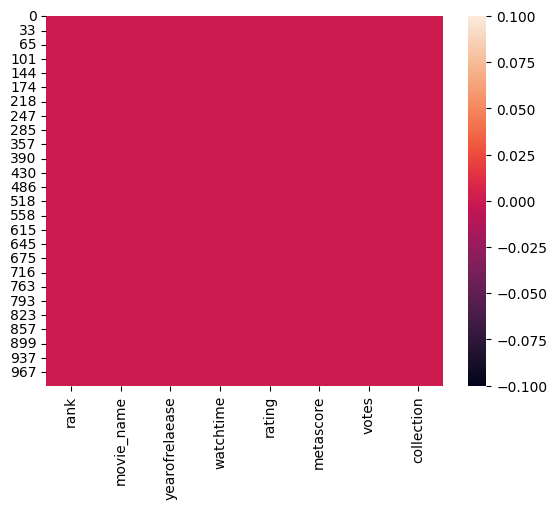

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.duplicated().sum()

0

In [17]:
df["collection"]=df["collection"].astype(int)

In [18]:
df["yearofrelaease"]=df["yearofrelaease"].astype(int)

In [19]:
df["metascore"]=df["metascore"].astype(int)

Analysing the Daya

In [49]:
rating_mean=df['rating'].mean();
print(rating_mean)

7.962284196547145


In [50]:
metascore_mean=df['metascore'].mean()
metascore_mean

78.34395750332006

In [51]:
votes_mean=df['votes'].mean()
votes_mean

387696.69322709163

In [52]:
collection_mean=df['collection'].mean()
collection_mean

73.48605577689243

<AxesSubplot: >

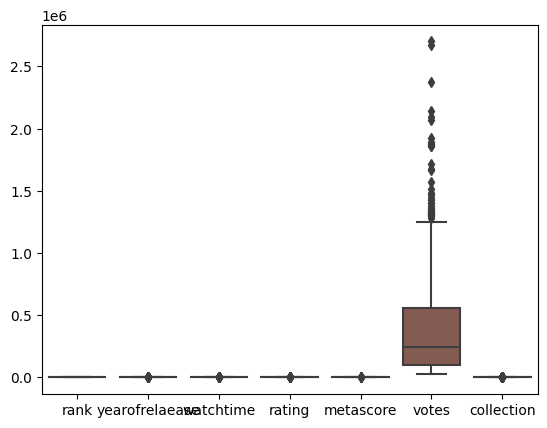

In [24]:
#checking for outliners
sns.boxplot(df)

C:\Users\ankit\AppData\Local\Temp\ipykernel_19676\3463540375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmax=0.5)


<AxesSubplot: >

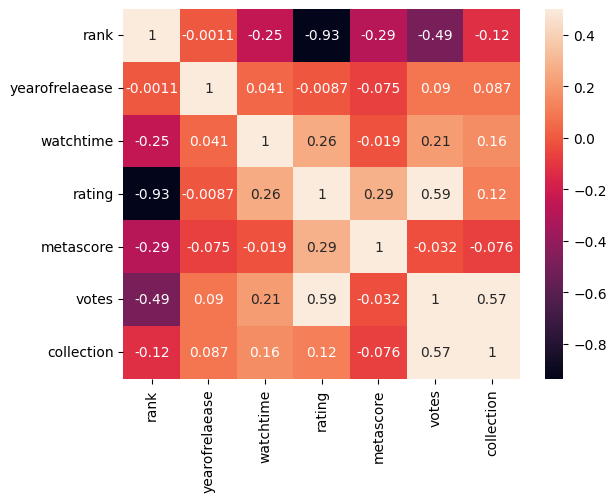

In [53]:
#Understanding Correlation between the different parameters
sns.heatmap(df.corr(),annot=True,vmax=0.5)

Movies with runtime 3hrs or more

In [26]:
df[df['watchtime']>180][['movie_name','watchtime','rating','collection']]

,movie_name,watchtime,rating,collection
3,Schindler's List,195,9.0,96
4,The Godfather Part II,202,9.0,57
6,The Lord of the Rings: The Return of the King,201,9.0,377
26,The Green Mile,189,8.6,136
33,Shichinin no samurai,207,8.6,0
60,Avengers: Endgame,181,8.4,858
106,Once Upon a Time in America,229,8.3,5
114,Lawrence of Arabia,218,8.3,44
166,Gone with the Wind,238,8.2,198
245,The Deer Hunter,183,8.1,48


Mean Revenue Collection Yearwise of Top 25 Movies

In [27]:
df.groupby('yearofrelaease')['collection'].sum().sort_values(ascending=False).head(25)

yearofrelaease
2014    2729
2016    2573
2012    2530
2010    2461
2019    2457
2009    2343
2015    2257
2008    2033
2001    1984
2018    1964
2017    1879
2003    1474
2004    1435
2005    1375
2013    1271
1997    1258
1999    1215
2006    1151
1993    1134
2011    1083
2002    1072
2007    1070
1995     947
1994     941
2021     912
Name: collection, dtype: int32

Yearwise Revenue Collection

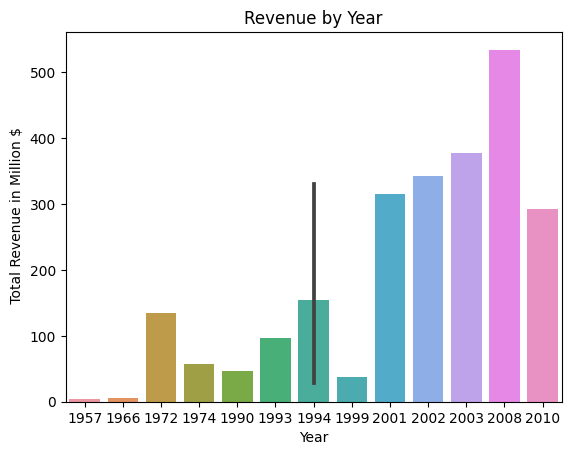

In [28]:
sns.barplot(x=df['yearofrelaease'].head(15),y='collection',data=df)
plt.xlabel("Year")
plt.ylabel(" Total Revenue in Million $")
plt.title("Revenue by Year")
plt.show()

Yearwise Mean Votes of Top 15 Years

In [29]:
rating_trend=df.groupby('yearofrelaease')['rating'].mean().sort_values(ascending=False).head(15)
rating_trend

yearofrelaease
1931    8.500000
1936    8.500000
1957    8.366667
1942    8.350000
2022    8.300000
1977    8.300000
1944    8.300000
1994    8.300000
2020    8.266667
1954    8.220000
1950    8.200000
1948    8.200000
1928    8.200000
1927    8.200000
1975    8.183333
Name: rating, dtype: float64

Yearwise Rating Trend 

In [30]:
sort_year=df['yearofrelaease'].sort_values(ascending=False)
sort_year

94     2022
343    2021
141    2021
151    2020
181    2020
       ... 
200    1928
121    1927
301    1927
584    1925
942       0
Name: yearofrelaease, Length: 753, dtype: int32

10 Years Trend of Rating

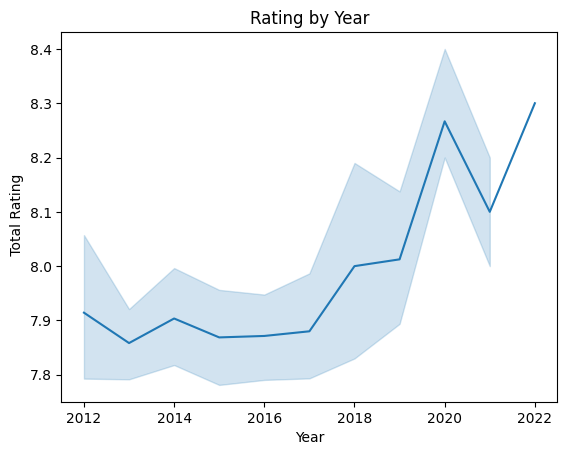

In [31]:
sns.lineplot(x=sort_year.head(150),y='rating',data=df)
plt.xlabel("Year")
plt.ylabel(" Total Rating")
plt.title("Rating by Year")
plt.show()

10 Years Trend of Run Time

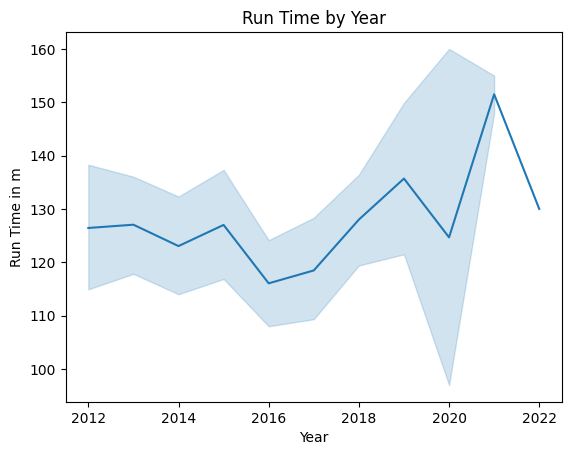

In [32]:
sns.lineplot(x=sort_year.head(150),y='watchtime',data=df)
plt.xlabel("Year")
plt.ylabel("Run Time in m")
plt.title("Run Time by Year")
plt.show()

10 Years Trend of Metascore

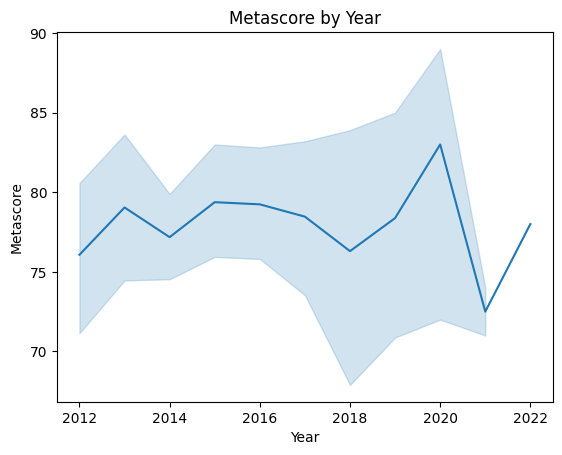

In [33]:
sns.lineplot(x=sort_year.head(150),y='metascore',data=df)
plt.xlabel("Year")
plt.ylabel("Metascore")
plt.title("Metascore by Year")
plt.show()

10 Years Trend of Revenue Collection

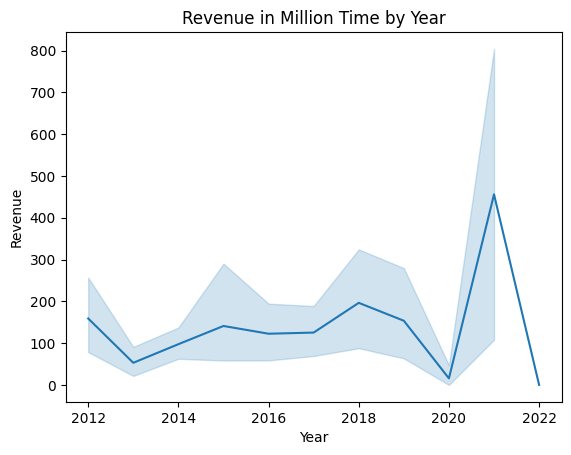

In [34]:
sns.lineplot(x=sort_year.head(150),y='collection',data=df)
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Revenue in Million Time by Year")
plt.show()

Top 10 Movies by Revenue collection

In [35]:
Top10_collection=df.nlargest(10,'collection')[['movie_name','yearofrelaease','rating','collection']].set_index('movie_name')
Top10_collection

,yearofrelaease,rating,collection
movie_name,,,
Star Wars: Episode VII - The Force Awakens,2015,7.8,936
Avengers: Endgame,2019,8.4,858
Spider-Man: No Way Home,2021,8.2,804
Avatar,2009,7.9,760
Avengers: Infinity War,2018,8.4,678
Titanic,1997,7.9,659
The Avengers,2012,8.0,623
The Dark Knight,2008,9.0,534
Rogue One,2016,7.8,532


Text(0.5, 1.0, 'Top 10 Movies by Revenue Collection')

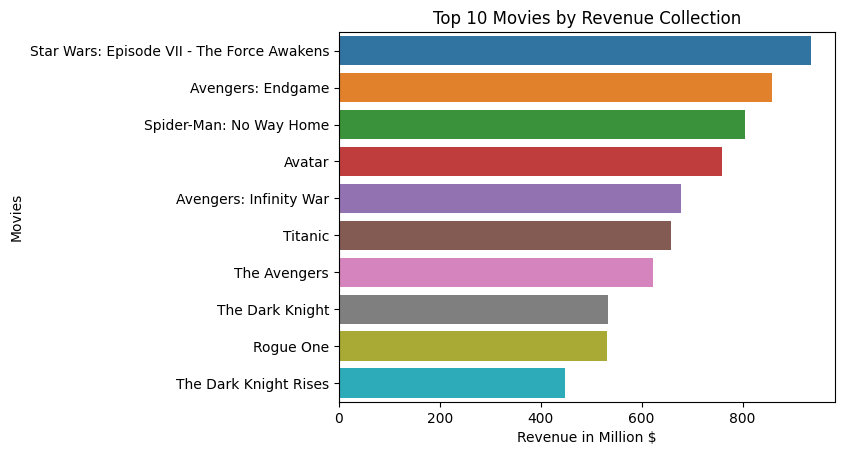

In [36]:
sns.barplot(x='collection',y=Top10_collection.index,data=Top10_collection)
plt.xlabel("Revenue in Million $")
plt.ylabel("Movies")
plt.title("Top 10 Movies by Revenue Collection")

Top 10 Movies By Rating

In [37]:
Top10_rating=df.nlargest(10,'rating')[['movie_name','yearofrelaease','rating','collection']].set_index('movie_name')
Top10_rating

,yearofrelaease,rating,collection
movie_name,,,
The Shawshank Redemption,1994,9.3,28
The Godfather,1972,9.2,134
The Dark Knight,2008,9.0,534
Schindler's List,1993,9.0,96
The Godfather Part II,1974,9.0,57
12 Angry Men,1957,9.0,4
The Lord of the Rings: The Return of the King,2003,9.0,377
Pulp Fiction,1994,8.9,107
Inception,2010,8.8,292


Text(0.5, 1.0, 'Top 10 Movies by Rating')

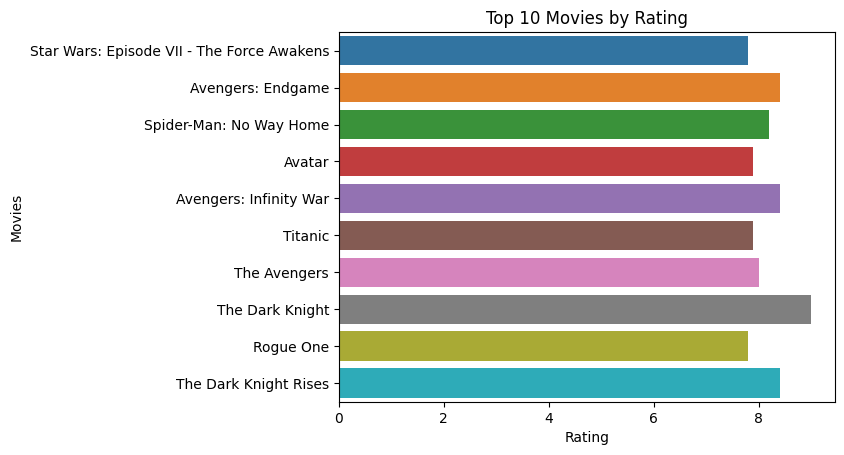

In [38]:
sns.barplot(x='rating',y=Top10_collection.index,data=Top10_collection)
plt.xlabel("Rating")
plt.ylabel("Movies")
plt.title("Top 10 Movies by Rating")

Top 20 Movies with heighest Metascores

In [39]:
Top10_metascore=df.nlargest(20,'metascore')[['movie_name','yearofrelaease','rating','metascore']].set_index('movie_name')
Top10_metascore

,yearofrelaease,rating,metascore
movie_name,,,
The Godfather,1972,9.2,100
Casablanca,1942,8.5,100
Rear Window,1954,8.5,100
Lawrence of Arabia,1962,8.3,100
Citizen Kane,1941,8.3,100
Vertigo,1958,8.3,100
Tôkyô monogatari,1953,8.2,100
Trois couleurs: Rouge,1994,8.1,100
Fanny och Alexander,1982,8.1,100


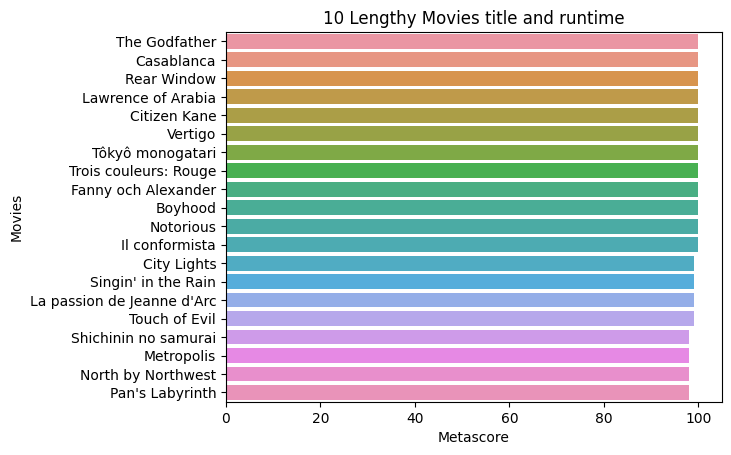

In [40]:
sns.barplot(x='metascore',y=Top10_metascore.index,data=Top10_metascore)
plt.xlabel("Metascore")
plt.ylabel("Movies")
plt.title("10 Lengthy Movies title and runtime")
plt.show()

Top 10 Movies with Longest Runtime

In [41]:
Top10_runtime=df.nlargest(10,'watchtime')[['movie_name','yearofrelaease','watchtime']].set_index('movie_name')
Top10_runtime

,yearofrelaease,watchtime
movie_name,,
Gone with the Wind,1939,238
Once Upon a Time in America,1984,229
Lagaan: Once Upon a Time in India,2001,224
Lawrence of Arabia,1962,218
Ben-Hur,1959,212
The Irishman,2019,209
Shichinin no samurai,1954,207
The Godfather Part II,1974,202
Malcolm X,1992,202


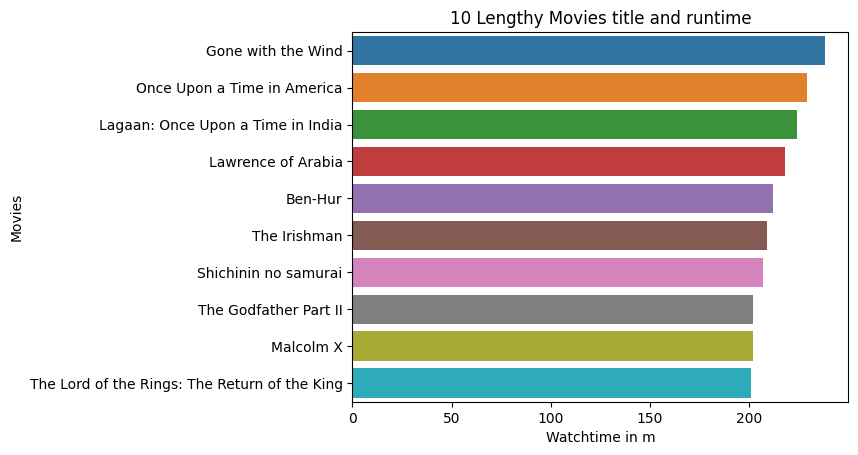

In [42]:
sns.barplot(x='watchtime',y=Top10_runtime.index,data=Top10_runtime)
plt.xlabel("Watchtime in m")
plt.ylabel("Movies")
plt.title("10 Lengthy Movies title and runtime")
plt.show()

In [43]:
#binning ie categorising rating into 3 different categories 
bins=np.linspace(min(df["rating"]),max(df["rating"]),4)
grp_name=["low","average","high"]
df["Binned_Ratting"]=pd.cut(df["rating"],bins,labels=grp_name,include_lowest=True)

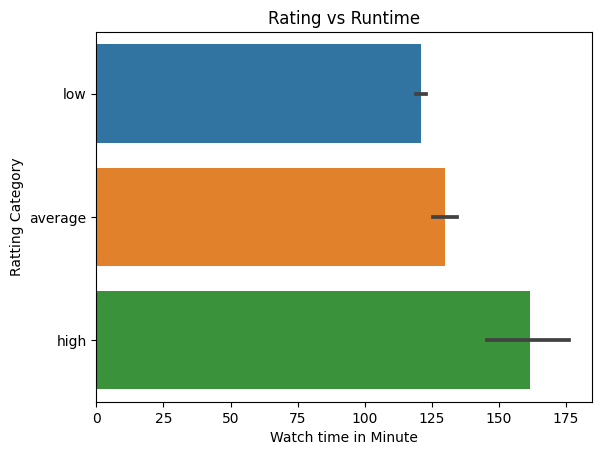

In [44]:
sns.barplot(x='watchtime',y='Binned_Ratting',data=df)
plt.title("Rating vs Runtime")
plt.xlabel("Watch time in Minute")
plt.ylabel("Ratting Category")
plt.show()

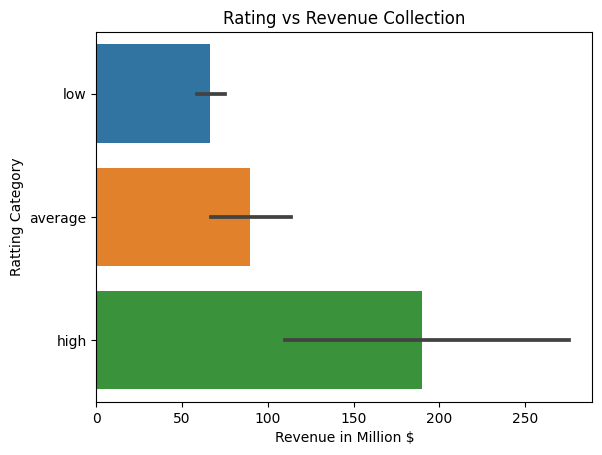

In [54]:
sns.barplot(x='collection',y='Binned_Ratting',data=df)
plt.xlabel("Revenue in Million $")
plt.ylabel("Ratting Category")
plt.title("Rating vs Revenue Collection")
plt.show()